# Lookup Table Generation for Point Lens Amplification factors
### For broader $y \in (10^{-3}, 5)$
### The settings are given here but whole lookup table is not generated. Instead, only part from (1e-3, 1e-2) is generated and then added to the existing data.

In [88]:
#!/home/anuj.mishra/anaconda3/envs/gwpy/bin/python

import numpy as np

import sys
import mpmath
from mpmath import hyp1f1
import math
import scipy
import pandas as pd

from copy import deepcopy

from itertools import product
from functools import partial
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import pickle

sys.path.append('../src/')
# loading Python version of the point lens class
import pnt_lens_class 
pnt_lens_py = pnt_lens_class.point_lens()

# loading Cython version of the point lens class
import cythonized_pnt_lens_class as pnt_lens_cy


import multiprocessing as mp
npool = 1  # int(sys.argv[1])


G = 6.67430*1e-11 
c = 299792458. 
M_sun = 1.989*1e30

## 1. Bounds on w for lookup table 

In [2]:
w_min, w_max = pnt_lens_cy.w_of_f(10, ml=1e-1), pnt_lens_cy.w_of_f(1024, ml=1e5)
('rough lower and upper limits of w:' , w_min, w_max )

('rough lower and upper limits of w:',
 0.00012382782869256283,
 12679.969658118436)

## 3. Grid Generation

46302 50000


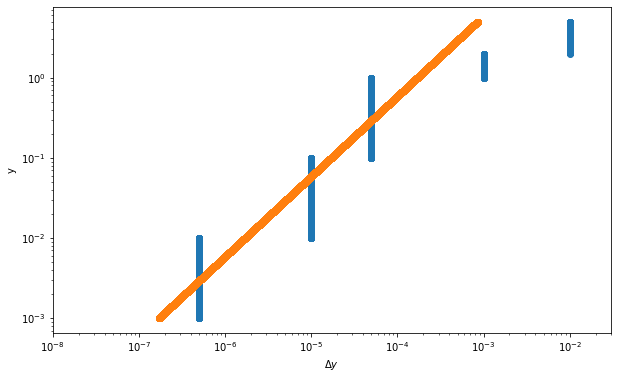

In [28]:
## fitting a logspace for y grid points 
ys_regs = [np.arange(1e-3, 1e-2, 5e-7), np.arange(1e-2, 1e-1, 1e-5), np.arange(1e-1, 1e-0, 5e-5), np.arange(1e0, 2e0, 1e-3),\
      np.arange(2e0, 5e0+1e-2, 1e-2)]
ys = np.concatenate(ys_regs)
ys2 = np.logspace(-3, np.log10(5), 50000)
print(len(ys), len(ys2))

dys = [ ys[i+1] - ys[i] for i in range(len(ys) -1 )]
dys2 = [ ys2[i+1] - ys2[i] for i in range(len(ys2) -1 )]

# plt.scatter(ys[:-1], dys)
# plt.scatter(ys2[:-1], dys2)
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(dys, ys[:-1])
plt.scatter(dys2, ys2[:-1])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\Delta y$')
plt.ylabel('y')
# plt.xticks(np.logspace(-7, -2, 5))
plt.xlim(1e-8, 3e-2)
plt.show()

In [4]:
from scipy.interpolate import interp1d

In [5]:
ifdy = interp1d(ys2[:-1], dys2)      

In [6]:
ifdy(1e-3), ifdy(1e-2), ifdy(1e-1), ifdy(1e-0), ifdy(3e-0)

(array(1.70361781e-07),
 array(1.70361781e-06),
 array(1.70361781e-05),
 array(0.00017036),
 array(0.00051109))

In [73]:
ys = np.logspace(-2, np.log10(5), 40000)
dys = [ ys[i+1] - ys[i] for i in range(len(ys) -1 )]
ifdy = interp1d(ys[:-1], dys, fill_value="extrapolate")      

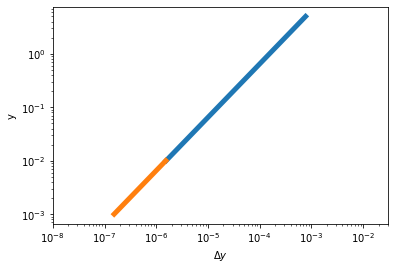

In [82]:
ys = np.logspace(-2, np.log10(5), 40000)
plt.plot(ifdy(ys), ys, linewidth=5)
nys = np.logspace(-3, -2, 15000)[:-1]
dnys = [ nys[i+1] - nys[i] for i in range(len(nys) -1 )]
plt.plot(dnys, nys[:-1], linewidth=5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\Delta y$')
plt.ylabel('y')
# plt.xticks(np.logspace(-7, -2, 5))
plt.xlim(1e-8, 3e-2)
plt.show()

7502 8000


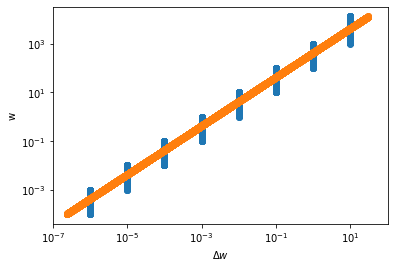

In [84]:
## fitting a logspace for w grid points 

# ws_regs = [np.arange(1e-4, 1e-3, 5e-6),
# np.arange(1e-3, 1e-2, 5e-5),
# np.arange(1e-2, 1e-1, 5e-4),
# np.arange(1e-1, 1e-0, 5e-3),
# np.arange(1e-0, 1e1, 5e-2),
# np.arange(1e1, 1e2, 5e-1),
# np.arange(1e2, 1e3, 5e0),
# np.arange(1e3, 1.3e4+5e1, 5e1)]
# ws = np.concatenate(ws_regs)

ws_regs = [np.arange(1e-4, 1e-3, 1e-6),
np.arange(1e-3, 1e-2, 1e-5),
np.arange(1e-2, 1e-1, 1e-4),
np.arange(1e-1, 1e-0, 1e-3),
np.arange(1e-0, 1e1, 1e-2),
np.arange(1e1, 1e2, 1e-1),
np.arange(1e2, 1e3, 1e0),
np.arange(1e3, 1.3e4+1e1, 1e1)]
ws = np.concatenate(ws_regs)

ws2 = np.logspace(-4, np.log10(1.3e4), 8000)

print(len(ws), len(ws2))

dws = [ ws[i+1] - ws[i] for i in range(len(ws) -1 )]
dws2 = [ ws2[i+1] - ws2[i] for i in range(len(ws2) -1 )]

# plt.scatter(ys[:-1], dys)
# plt.scatter(ys2[:-1], dys2)
plt.scatter(dws, ws[:-1])
plt.scatter(dws2, ws2[:-1])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\Delta w$')
plt.ylabel('w')
plt.xlim(1e-7, 1e2)
plt.show()

In [117]:
### Grid Generation ###

ws_min, ws_max = 1e-4, 1.3e4

ys = np.logspace(-3, -2, 15000)[:-1]
ws = np.logspace(np.log10(ws_min), np.log10(ws_max), 6000)

y_w_grid = []   #np.array([None]*len(input_prms))
for y in ys[:]:
    if y>0.01:
        wc = pnt_lens_cy.wc_geo_re1p0(y)
    else:
        wc = ws_max
    tmp_ws = ws[ws<=1.1*wc]
    y_w_grid.append([y, tmp_ws])
    
y_w_grid = np.array(y_w_grid, dtype=object)     
grid_num =  np.sum([len(y_w_grid[i][1]) for i in range(len(y_w_grid))])

print('ys: ({:.3f}, {:.3f}), len(ys)={}'.format(ys[0], ys[-1], len(ys)))
print('ws: ({:.4f}, {:2f}), max_len(ws)={}'.format(ws[0], ws[-1], len(ws)))
print('Total points in grid: ', grid_num)

ys: (0.001, 0.010), len(ys)=14999
ws: (0.0001, 13000.000000), max_len(ws)=6000
Total points in grid:  89994000


## 4. Generating the lookup table

In [116]:
import pickle

outdir='../data/'
label = 'point_lens_Ff_lookup_table_Geo_relErr_1p0_ys_1en3_1en2'

if __name__=='__main__': 
    npool = 3
    pool = mp.Pool(processes=npool)
    t1=time.time()
    Ff_grid = dict()
    k=0
    for y_ws in tqdm(y_w_grid):
        g_y = y_ws[0]
        g_ws = y_ws[1]
        Ff_eff_partial = partial(pnt_lens_py.point_Fw, y = g_y)
        tmp_res = np.array(list(pool.map(Ff_eff_partial, g_ws)))
        Ff_grid[str(k)] = dict(y=g_y, ws=g_ws, Ffs_real=np.real(tmp_res), Ffs_imag=np.imag(tmp_res))    
        k+=1
    t2 = time.time() 
    print('\nComputation Time (generation) = {:.2f} s'.format(t2-t1))

t1 = time.time()
with open(outdir + label + '.pkl', 'wb') as f:
    pickle.dump(Ff_grid, f)
t2 = time.time() 
print('Computation Time (exporting) = {:.2f} s'.format(t2-t1))  

with open(outdir + label + '.pkl', 'rb') as f:
    Ff_grid = pickle.load(f)

print('\nNumber of entries in lookup_table: ', len(Ff_grid))    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.97it/s]


Computation Time (generation) = 7.09 s
Computation Time (exporting) = 0.00 s

Number of entries in lookup_table:  14


In [118]:
outdir='../data/'
label = 'point_lens_Ff_lookup_table_Geo_relErr_1p0'

with open(outdir + label + '.pkl', 'rb') as f:
    Ff_grid = pickle.load(f)
Ff_grid_1 = Ff_grid
    
outdir='../data/'
label = 'point_lens_Ff_lookup_table_Geo_relErr_1p0_ys_1en3_1en2'

with open(outdir + label + '.pkl', 'rb') as f:
    Ff_grid = pickle.load(f)
Ff_grid_2 = Ff_grid

In [119]:
len(Ff_grid_1), len(Ff_grid_2)

(35000, 14)

In [125]:
Ff_grid_c = dict()

for i in range(len(Ff_grid_2)):
    Ff_grid_c[str(i)] = Ff_grid_2[str(i)]
    
for i in range(len(Ff_grid_1)):
    Ff_grid_c[str(i + len(Ff_grid_2))] = Ff_grid_1[str(i)]    

In [126]:
len(Ff_grid_c)

35014

In [129]:
Ff_grid_c['35013']

{'y': 5.000000000000001,
 'ws': array([1.00000000e-04, 1.00311921e-04, 1.00624816e-04, ...,
        1.17441312e+00, 1.17807637e+00, 1.18175104e+00]),
 'Ffs_real': array([1.00007843, 1.00007868, 1.00007892, ..., 1.03330595, 1.03429526,
        1.03516398]),
 'Ffs_imag': array([-0.00030347, -0.00030426, -0.00030505, ..., -0.01726775,
        -0.01526243, -0.01319419])}

In [ ]:
import numpy as np
import pickle

outdir='../data/'
label = 'point_lens_Ff_lookup_table_Geo_relErr_1p0'

with open(outdir + label + '.pkl', 'rb') as f:
    Ff_grid = pickle.load(f)
Ff_grid_1 = Ff_grid
    
outdir='../data/'
label = 'point_lens_Ff_lookup_table_Geo_relErr_1p0_ys_1en3_1en2'

with open(outdir + label + '.pkl', 'rb') as f:
    Ff_grid = pickle.load(f)
Ff_grid_2 = Ff_grid


Ff_grid_c = dict()

for i in range(len(Ff_grid_2)):
    Ff_grid_c[str(i)] = Ff_grid_2[str(i)]
    
for i in range(len(Ff_grid_1)):
    Ff_grid_c[str(i + len(Ff_grid_2))] = Ff_grid_1[str(i)]

label = 'point_lens_Ff_lookup_table_Geo_relErr_1p0_Mlz_1e-1_1e5_ys_1e-3_5'    
with open(outdir + label + '.pkl', 'wb') as f:
    pickle.dump(Ff_grid_c, f)    
with open(outdir + label + '.pkl', 'rb') as f:
    Ff_grid = pickle.load(f)    
print('\nNumber of entries in lookup_table: ', len(Ff_grid))      

In [ ]:

def pnt_Ff_lookup_table(fs, Mlz, yl, ys_grid, ws_grid, extrapolate=False):
    wfs = np.array([pnt_lens_cy.w_of_f(f, Mlz) for f in fs])
    
    if yl >= 1e-2:
        wc = pnt_lens_cy.wc_geo_re1p0(yl)
    else:
        wc = np.max(wfs)

    wfs_1 = wfs[wfs <= np.min(ws_grid)]
    Ffs_1 = np.array([1]*len(wfs_1))

    wfs_2 = wfs[(wfs > np.min(ws_grid))&(wfs <= np.max(ws_grid))]
    wfs_2_wave = wfs_2[wfs_2 <= wc]
    wfs_2_geo = wfs_2[wfs_2 > wc]

    i_y  = y_index(yl, ys_grid)
    tmp_Ff_dict = Ff_grid[str(i_y)]
    ws = tmp_Ff_dict['ws']
    Ffs = tmp_Ff_dict['Ffs_real'] + 1j*tmp_Ff_dict['Ffs_imag']
    fill_val = ['interpolate', 'extrapolate'][extrapolate]
    i_Ff = interp1d(ws, Ffs, fill_value=fill_val)
    Ffs_2_wave = i_Ff(wfs_2_wave)

    Ffs_2_geo = np.array([pnt_lens_cy.point_Fw_geo(w, yl) for w in wfs_2_geo])

    wfs_3 = wfs[wfs > np.max(ws_grid) ]
    Ffs_3 = np.array([pnt_lens_cy.point_Fw_geo(w, Mlz) for w in wfs_3])

    Ffs = np.concatenate((Ffs_1, Ffs_2_wave, Ffs_2_geo, Ffs_3))
    assert len(Ffs)==len(fs), 'len(Ffs) = {} does not match len(fs) = {}'.format(len(Ffs), len(fs))
    return Ffs